# Problem Statement
The goal is to improve the overall performance of a contact center by analyzing customer feedback to identify key themes, sentiment trends, and their correlation with satisfaction metrics. By leveraging Natural Language Processing (NLP), the analysis aims to:

Identify Common Themes: Understand frequently mentioned topics and pain points from customer feedback.
Analyze Sentiment Trends: Determine whether the feedback reflects positive, neutral, or negative sentiments.
Correlate Insights with Satisfaction Metrics: Explore how sentiment and themes impact Customer Satisfaction Score (CSAT) and Net Promoter Score (NPS).
This analysis will provide actionable insights to enhance customer experience and service quality.



# Step 1: Load the Dataset
Importing the necessary libraries.

Load the dataset into a DataFrame.

In [11]:
import pandas as pd
df = pd.read_csv("Contact_Center_Feedback.csv")
print(df.head())


   Feedback ID                                      Feedback Text  CSAT  NPS
0            1  The resolution took too long, not happy with t...   1.6    9
1            2             I had to wait too long, very annoying!   1.6    3
2            3             The agent was very helpful and polite.   4.0    1
3            4         Very helpful staff, made the process easy.   3.2    9
4            5             Agent was kind but took too much time.   4.0    2


# Step 2: Text Preprocessing
Prepare the text data for analysis:

Convert to lowercase: Ensure uniformity.

Remove punctuation: Eliminate unnecessary characters.

Tokenize: Split the feedback text into words.

Remove stopwords: Exclude words like "the," "is," "and" that don't add meaning.

Lemmatize: Reduce words to their base form.

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    tokens = [word for word in tokens if word.isalnum()]  # Remove punctuation
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize
    return " ".join(tokens)

df['Cleaned Feedback'] = df['Feedback Text'].apply(preprocess_text)
print(df[['Feedback Text', 'Cleaned Feedback']].head())


                                       Feedback Text  \
0  The resolution took too long, not happy with t...   
1             I had to wait too long, very annoying!   
2             The agent was very helpful and polite.   
3         Very helpful staff, made the process easy.   
4             Agent was kind but took too much time.   

                     Cleaned Feedback  
0  resolution took long happy service  
1                  wait long annoying  
2                agent helpful polite  
3     helpful staff made process easy  
4           agent kind took much time  


[nltk_data] Downloading package punkt to C:\Users\Sagnik
[nltk_data]     Roy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Sagnik
[nltk_data]     Roy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Sagnik
[nltk_data]     Roy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Step 3: Sentiment Analysis
Use a sentiment analysis library (e.g., VADER from NLTK) to score customer feedback.
Add a column for sentiment scores (positive, neutral, negative).

In [14]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
df['Sentiment Score'] = df['Cleaned Feedback'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['Sentiment'] = df['Sentiment Score'].apply(lambda x: 'Positive' if x > 0.05 else 'Negative' if x < -0.05 else 'Neutral')
print(df[['Feedback Text', 'Sentiment', 'Sentiment Score']].head())


                                       Feedback Text Sentiment  \
0  The resolution took too long, not happy with t...  Positive   
1             I had to wait too long, very annoying!  Negative   
2             The agent was very helpful and polite.  Positive   
3         Very helpful staff, made the process easy.  Positive   
4             Agent was kind but took too much time.  Positive   

   Sentiment Score  
0           0.5719  
1          -0.4019  
2           0.4215  
3           0.6908  
4           0.5267  


# Step 4: Theme Extraction (Topic Modeling)
## Convert the cleaned feedback into a document-term matrix using CountVectorizer.
## Apply Latent Dirichlet Allocation (LDA) to identify themes.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Create document-term matrix
vectorizer = CountVectorizer(stop_words='english')
dtm = vectorizer.fit_transform(df['Cleaned Feedback'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(dtm)

# Extract themes
terms = vectorizer.get_feature_names_out()
themes = []
for topic_idx, topic in enumerate(lda.components_):
    themes.append([terms[i] for i in topic.argsort()[:-6:-1]])

print("Identified Themes:")
for i, theme in enumerate(themes):
    print(f"Theme {i + 1}: {', '.join(theme)}")


Identified Themes:
Theme 1: agent, time, received, assistance, satisfied
Theme 2: issue, resolved, agent, patient, perfectly
Theme 3: service, long, recommend, happy, resolution


# Step 5: Correlation with CSAT and NPS
## Calculate the correlation between sentiment scores and customer metrics (CSAT, NPS).
## Visualize the relationships.

In [18]:
csat_corr = df[['Sentiment Score', 'CSAT']].corr().iloc[0, 1]
nps_corr = df[['Sentiment Score', 'NPS']].corr().iloc[0, 1]

print(f"Correlation between Sentiment Score and CSAT: {csat_corr}")
print(f"Correlation between Sentiment Score and NPS: {nps_corr}")


Correlation between Sentiment Score and CSAT: 0.017064241627195983
Correlation between Sentiment Score and NPS: 0.01418149022891249


# Step 6: Visualization
Word Cloud: Highlight frequent words in feedback.
Sentiment Distribution: Show positive, neutral, and negative sentiment proportions.
Theme Frequency: Visualize theme occurrences

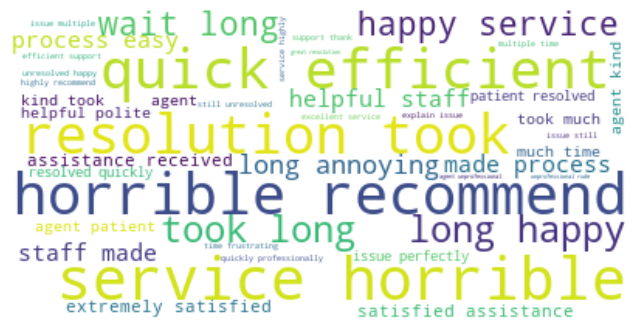

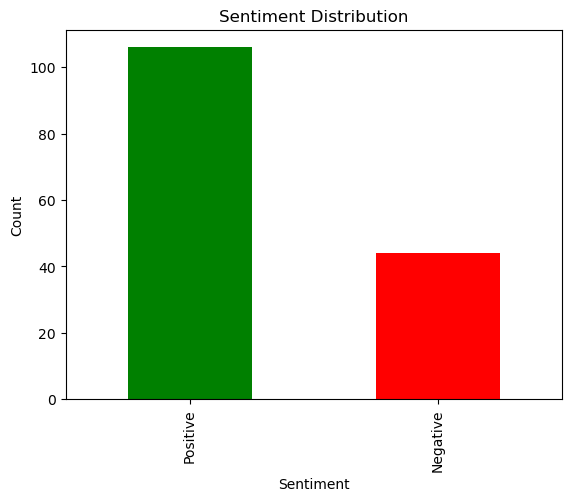

In [19]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Word Cloud
wordcloud = WordCloud(background_color='white').generate(" ".join(df['Cleaned Feedback']))
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Sentiment Distribution
df['Sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'], title="Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()
